In [28]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

(array([   9.,   62.,  294.,  766., 1432., 2130., 2355., 1864.,  930.,
         158.]),
 array([0.10710711, 0.19459459, 0.28208208, 0.36956957, 0.45705706,
        0.54454454, 0.63203203, 0.71951952, 0.80700701, 0.89449449,
        0.98198198]),
 <a list of 10 Patch objects>)

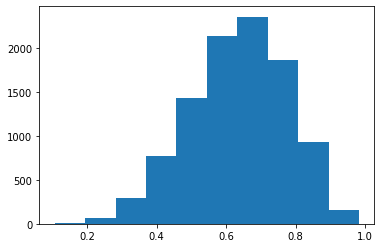

In [10]:
# p_grid <- seq( from=0 , to=1 , length.out=1000 )
# prior <- rep( 1 , 1000 )
# likelihood <- dbinom( 6 , size=9 , prob=p_grid )
# posterior <- likelihood * prior
# posterior <- posterior / sum(posterior)
# set.seed(100)
# samples <- sample( p_grid , prob=posterior , size=1e4 , replace=TRUE )”

n_grid_points = 1000
p_grid = np.linspace(0, 1, n_grid_points)

prior = np.ones_like(p_grid)
likelihood = stats.binom.pmf(6, 9, p_grid)

unstd_posterior = likelihood * prior

posterior = unstd_posterior / unstd_posterior.sum()

np.random.seed(100)

n_samples = int(1e4)
samples = np.random.choice(p_grid, p=posterior, size=n_samples, replace=True)

plt.hist(samples)


In [22]:
(samples < 0.23).sum() / n_samples


0.0021

In [17]:
(samples > 0.8).sum() / n_samples


0.1209

In [19]:
((0.2  < samples) &( samples < 0.8)).sum() / n_samples


0.8781

In [27]:
np.percentile(samples, [20, 80])

array([0.51551552, 0.75975976])

In [42]:
az.hdi(samples, .66)

array([0.51651652, 0.78878879])

(array([  24.,   81.,  228.,  515.,  808., 1233., 1479., 1639., 1513.,
        1108.,  799.,  377.,  153.,   33.,   10.]),
 array([0.16116116, 0.21134468, 0.26152819, 0.31171171, 0.36189523,
        0.41207875, 0.46226226, 0.51244578, 0.5626293 , 0.61281281,
        0.66299633, 0.71317985, 0.76336336, 0.81354688, 0.8637304 ,
        0.91391391]),
 <a list of 15 Patch objects>)

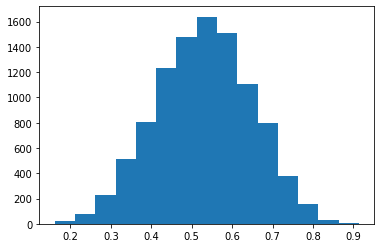

In [71]:
likelihood = stats.binom.pmf(8, 15, p_grid)

unstd_posterior = likelihood * prior

posterior = unstd_posterior / unstd_posterior.sum()

np.random.seed(101)

n_samples = int(1e4)
samples = np.random.choice(p_grid, p=posterior, size=n_samples, replace=True)

plt.hist(samples)

In [54]:
az.hdi(samples, 0.9)

array([0.33433433, 0.72072072])

(array([5.000e+00, 2.000e+01, 7.500e+01, 2.550e+02, 6.440e+02, 1.217e+03,
        1.759e+03, 2.000e+03, 1.847e+03, 1.232e+03, 6.460e+02, 2.420e+02,
        4.800e+01, 9.000e+00, 1.000e+00]),
 array([ 1.        ,  1.93333333,  2.86666667,  3.8       ,  4.73333333,
         5.66666667,  6.6       ,  7.53333333,  8.46666667,  9.4       ,
        10.33333333, 11.26666667, 12.2       , 13.13333333, 14.06666667,
        15.        ]),
 <a list of 15 Patch objects>)

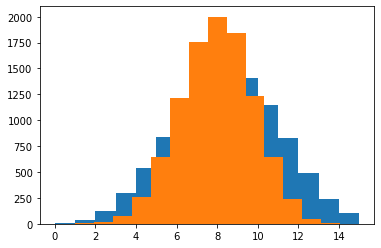

In [75]:
posterior_predictive = stats.binom(n=15, p = samples).rvs(size=n_samples)

plt.hist(posterior_predictive, bins=15)

binomial_samples = stats.binom(n=15, p = 8/15).rvs(size=n_samples)

plt.hist(binomial_samples, bins=15)

In [69]:
(posterior_predictive == 8).sum() / n_samples

0.1472

(0, 1)

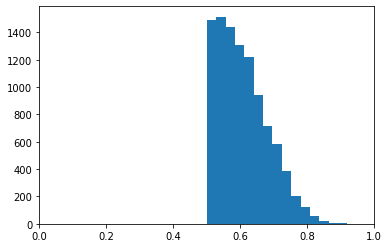

In [91]:
n_grid_points = 10000
p_grid = np.linspace(0, 1, n_grid_points) 

prior = np.where(p_grid < .5, 0, 1)

likelihood = stats.binom.pmf(8, 15, p_grid)

unstd_posterior = likelihood * prior

posterior = unstd_posterior / unstd_posterior.sum()

np.random.seed(101)

n_samples = int(1e4)
samples = np.random.choice(p_grid, p=posterior, size=n_samples, replace=True)

plt.hist(samples, bins=15)

plt.xlim(0,1)

In [92]:
az.hdi(samples, 0.9)

array([0.50005001, 0.71337134])

(array([1.000e+00, 1.100e+01, 7.400e+01, 2.530e+02, 6.150e+02, 1.257e+03,
        1.785e+03, 2.075e+03, 1.802e+03, 1.188e+03, 6.310e+02, 2.380e+02,
        6.200e+01, 7.000e+00, 1.000e+00]),
 array([ 1.        ,  1.93333333,  2.86666667,  3.8       ,  4.73333333,
         5.66666667,  6.6       ,  7.53333333,  8.46666667,  9.4       ,
        10.33333333, 11.26666667, 12.2       , 13.13333333, 14.06666667,
        15.        ]),
 <a list of 15 Patch objects>)

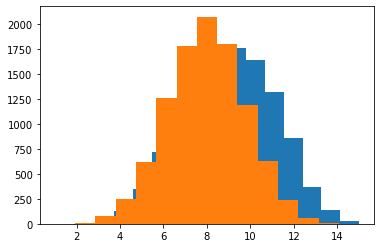

In [94]:
posterior_predictive = stats.binom(n=15, p = samples).rvs(size=n_samples)


plt.hist(posterior_predictive, bins=15)


binomial_samples = stats.binom(n=15, p = 8/15).rvs(size=n_samples)

plt.hist(binomial_samples, bins=15)

In [95]:
(posterior_predictive == 8).sum() / n_samples

0.1522

(array([   3.,    9.,   32.,  119.,    0.,  347.,  839., 1475., 2004.,
           0., 2203., 1727.,  921.,  285.,   36.]),
 array([ 3. ,  3.8,  4.6,  5.4,  6.2,  7. ,  7.8,  8.6,  9.4, 10.2, 11. ,
        11.8, 12.6, 13.4, 14.2, 15. ]),
 <a list of 15 Patch objects>)

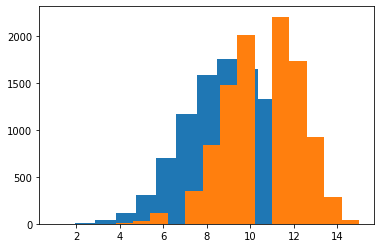

In [97]:
posterior_predictive = stats.binom(n=15, p = samples).rvs(size=n_samples)


plt.hist(posterior_predictive, bins=15)



binomial_samples_w_true = stats.binom(n=15, p = .7).rvs(size=n_samples)

plt.hist(binomial_samples_w_true, bins=15)

(array([1.000e+00, 3.000e+00, 3.300e+01, 1.040e+02, 0.000e+00, 3.490e+02,
        7.970e+02, 1.459e+03, 2.083e+03, 0.000e+00, 2.138e+03, 1.724e+03,
        9.740e+02, 2.920e+02, 4.300e+01]),
 array([ 3. ,  3.8,  4.6,  5.4,  6.2,  7. ,  7.8,  8.6,  9.4, 10.2, 11. ,
        11.8, 12.6, 13.4, 14.2, 15. ]),
 <a list of 15 Patch objects>)

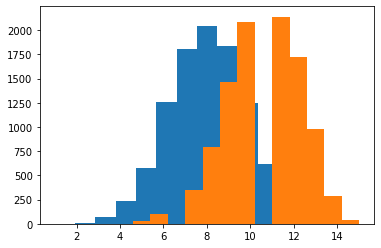

In [98]:


binomial_samples = stats.binom(n=15, p = 8/15).rvs(size=n_samples)

plt.hist(binomial_samples, bins=15)


binomial_samples_w_true = stats.binom(n=15, p = .7).rvs(size=n_samples)

plt.hist(binomial_samples_w_true, bins=15)

In [102]:
stats.binom(n=15, p = 8/15).rvs()

6

In [111]:
n_grid_points = 1000
p_grid = np.linspace(0, 1, n_grid_points) 

prior = np.ones_like(p_grid)

for n_draws in np.arange(4,50)**2:

    likelihood = stats.binom.pmf(int(.7 * n_draws), n_draws, p_grid)

    unstd_posterior = likelihood * prior

    posterior = unstd_posterior / unstd_posterior.sum()

    np.random.seed(101)

    n_samples = int(1e4)
    samples = np.random.choice(p_grid, p=posterior, size=n_samples, replace=True)

    hdi = az.hdi(samples, 0.99)
    print(f"n_draws = {n_draws}, hdi = {hdi}, with width {hdi[1]-hdi[0]}")

n_draws = 16, hdi = [0.38338338 0.90590591], with width 0.5225225225225225
n_draws = 25, hdi = [0.43443443 0.87287287], with width 0.43843843843843844
n_draws = 36, hdi = [0.48948949 0.85985986], with width 0.3703703703703703
n_draws = 49, hdi = [0.51551552 0.83883884], with width 0.32332332332332325
n_draws = 64, hdi = [0.53453453 0.82182182], with width 0.28728728728728736
n_draws = 81, hdi = [0.55155155 0.80780781], with width 0.25625625625625625
n_draws = 100, hdi = [0.57957958 0.80880881], with width 0.22922922922922917
n_draws = 121, hdi = [0.58458458 0.7957958 ], with width 0.21121121121121111
n_draws = 144, hdi = [0.59059059 0.78478478], with width 0.19419419419419415
n_draws = 169, hdi = [0.6046046  0.78378378], with width 0.17917917917917914
n_draws = 196, hdi = [0.61361361 0.77977978], with width 0.16616616616616608
n_draws = 225, hdi = [0.61761762 0.77277277], with width 0.1551551551551552
n_draws = 256, hdi = [0.62562563 0.77077077], with width 0.1451451451451451
n_draws =

In [105]:
np.arange(2,10)**2

array([ 4,  9, 16, 25, 36, 49, 64, 81])

In [115]:
birth1  = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])


In [117]:
(birth1 + birth2).sum()
birth1.size

100

0.9379

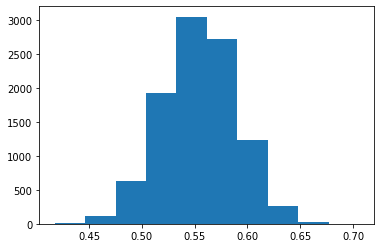

In [158]:
n_grid_points = 1000
n_samples = 10000

p_grid = np.linspace(0,1,n_grid_points)

prior = np.ones_like(p_grid)

likelihood = stats.binom.pmf(111, 200, p_grid)

unstd_posterior = likelihood * prior

posterior = unstd_posterior / unstd_posterior.sum()
posterior
samples = np.random.choice(p_grid, p=posterior, size=n_samples, replace=True)

plt.hist(samples)
(samples > 0.5).sum() / n_samples

In [159]:
p_grid[posterior == posterior.max()]

array([0.55455455])

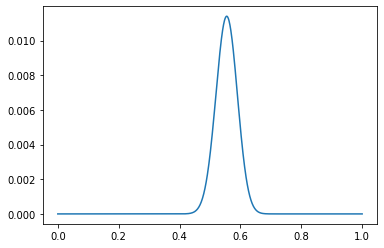

In [160]:
plt.plot(p_grid, posterior)

In [161]:
az.hdi(samples, 0.9)

array([0.49349349, 0.60760761])

In [162]:
az.hdi(samples, 0.5)

array([0.53053053, 0.57757758])

In [163]:
posterior_predictive = stats.binom.rvs(n=200, p=samples)
posterior_predictive

array([114, 108, 124, ..., 119, 108, 128])

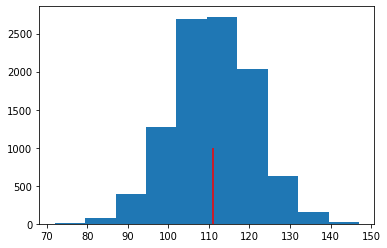

In [164]:

plt.hist(posterior_predictive)

plt.vlines(111, ymin = 0, ymax = 1000, colors="r")

plt.show()

In [165]:
(posterior_predictive < 111).sum() / n_samples

0.4839

In [166]:
az.hdi(posterior_predictive, 0.4)

array([103, 113])

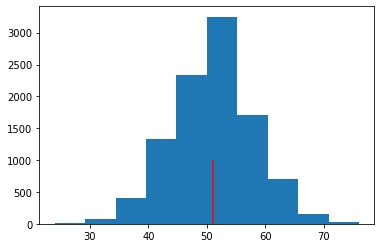

In [169]:
n_grid_points = 1000
n_samples = 10000

p_grid = np.linspace(0,1,n_grid_points)

prior = np.ones_like(p_grid)

likelihood = stats.binom.pmf(birth1.sum(), birth1.size, p_grid)

unstd_posterior = likelihood * prior

posterior = unstd_posterior / unstd_posterior.sum()
posterior
samples = np.random.choice(p_grid, p=posterior, size=n_samples, replace=True)

posterior_predictive = stats.binom.rvs(n=100, p=samples)

plt.hist(posterior_predictive)

plt.vlines(birth1.sum(), ymin = 0, ymax = 1000, colors="r")


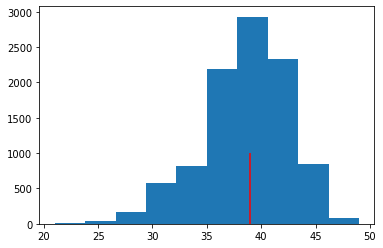

In [171]:
n_grid_points = 1000
n_samples = 10000

p_grid = np.linspace(0,1,n_grid_points)

prior = np.ones_like(p_grid)

n = (birth1==0).sum()
k = birth2[birth1==0].sum()
likelihood = stats.binom.pmf(k, n, p_grid)

unstd_posterior = likelihood * prior

posterior = unstd_posterior / unstd_posterior.sum()
posterior
samples = np.random.choice(p_grid, p=posterior, size=n_samples, replace=True)

posterior_predictive = stats.binom.rvs(n=n, p=samples)

plt.hist(posterior_predictive)

plt.vlines(k, ymin = 0, ymax = 1000, colors="r")


(49, 39)

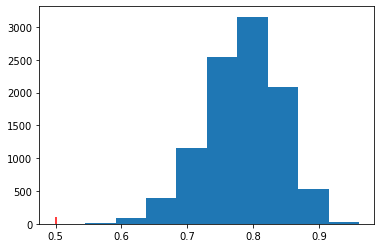

In [178]:
plt.hist(samples)
plt.vlines(x=0.5, ymin=0,ymax=100, colors="r")
n,k

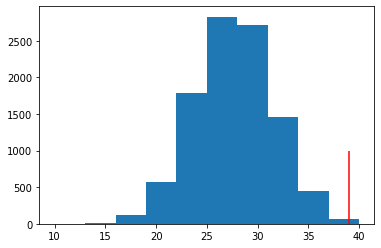

In [180]:
n_grid_points = 1000
n_samples = 10000

p_grid = np.linspace(0,1,n_grid_points)

prior = np.ones_like(p_grid)

# n = (birth1==0).sum()
# k = birth2[birth1==0].sum()
n =  birth1.size + birth2.size
k =  (birth1 + birth2).sum()

likelihood = stats.binom.pmf(k, n, p_grid)

unstd_posterior = likelihood * prior

posterior = unstd_posterior / unstd_posterior.sum()
posterior
samples = np.random.choice(p_grid, p=posterior, size=n_samples, replace=True)

n_g1 = (birth1==0).sum()
k_g1 = birth2[birth1==0].sum()
posterior_predictive = stats.binom.rvs(n=n_g1, p=samples)

plt.hist(posterior_predictive)

plt.vlines(k_g1, ymin = 0, ymax = 1000, colors="r")
